## Задание: предсказать цену за поездку на такси

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data=pd.read_csv("train.csv")
data.shape

(519803, 57)

In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,885116c8-8e5c-4d4e-af4d-1fd53c6b2464,1.543564e+09,7,30,11,2018-11-30 07:47:56,America/New_York,North Station,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,93fb610d-bb94-45bc-98b8-0a4a2e349ab2,1.544822e+09,21,14,12,2018-12-14 21:20:11,America/New_York,West End,South Station,Uber,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,69244a0f-6ec6-4265-b73e-3dcb069d671e,1.543834e+09,10,3,12,2018-12-03 10:52:59,America/New_York,Theatre District,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,230cbecb-368e-4b8d-b9f1-67a40f68991f,1.543759e+09,14,2,12,2018-12-02 14:03:04,America/New_York,Boston University,Back Bay,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,6c873c64-967e-47f2-bd89-5ec6fd330aa3,1.544973e+09,15,16,12,2018-12-16 15:05:17,America/New_York,Financial District,North End,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519803 entries, 0 to 519802
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           519803 non-null  object 
 1   timestamp                    519803 non-null  float64
 2   hour                         519803 non-null  int64  
 3   day                          519803 non-null  int64  
 4   month                        519803 non-null  int64  
 5   datetime                     519803 non-null  object 
 6   timezone                     519803 non-null  object 
 7   source                       519803 non-null  object 
 8   destination                  519803 non-null  object 
 9   cab_type                     519803 non-null  object 
 10  product_id                   519803 non-null  object 
 11  name                         519803 non-null  object 
 12  price                        478523 non-null  float64
 13 

# Feature preprocessing

In [7]:
#удаляем не несущие информацию столбцы id, product_id
data.drop(['id','product_id'], axis=1, inplace=True)
data.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543564e+09,7,30,11,2018-11-30 07:47:56,America/New_York,North Station,South Station,Lyft,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,1.544822e+09,21,14,12,2018-12-14 21:20:11,America/New_York,West End,South Station,Uber,Black SUV,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,1.543834e+09,10,3,12,2018-12-03 10:52:59,America/New_York,Theatre District,Boston University,Lyft,Shared,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,1.543759e+09,14,2,12,2018-12-02 14:03:04,America/New_York,Boston University,Back Bay,Uber,UberX,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,1.544973e+09,15,16,12,2018-12-16 15:05:17,America/New_York,Financial District,North End,Lyft,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [8]:
#проверим пропуски
data.isnull().sum()

timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          41280
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
t

In [9]:
#так как price - это то, что мы предсказываем, то выбросим строки, где нет price
data.dropna(axis=0, inplace=True)
data.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTe

In [10]:
data.timezone.value_counts()

America/New_York    478523
Name: timezone, dtype: int64

In [11]:
#выбрасываем этот признак, так как он одинаковый у всех строк
data.drop(['timezone'], axis=1, inplace=True)

In [12]:
data.source.value_counts()

Financial District         40690
South Station              39956
Haymarket Square           39927
North End                  39906
Back Bay                   39892
Boston University          39871
Fenway                     39865
West End                   39826
Northeastern University    39822
Beacon Hill                39750
Theatre District           39660
North Station              39358
Name: source, dtype: int64

<AxesSubplot:>

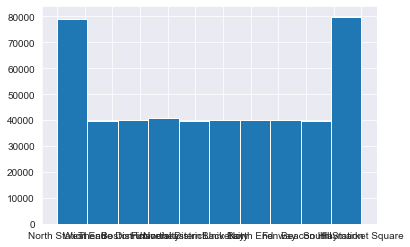

In [13]:
data.source.hist()

In [14]:
data.destination.value_counts()
#такие же, как в source

Financial District         40600
Theatre District           40031
Northeastern University    39960
Haymarket Square           39906
South Station              39901
Fenway                     39863
West End                   39830
North End                  39783
Boston University          39763
Back Bay                   39750
Beacon Hill                39688
North Station              39448
Name: destination, dtype: int64

<AxesSubplot:>

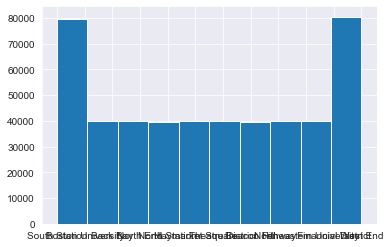

In [15]:
data.destination.hist()

<AxesSubplot:xlabel='destination'>

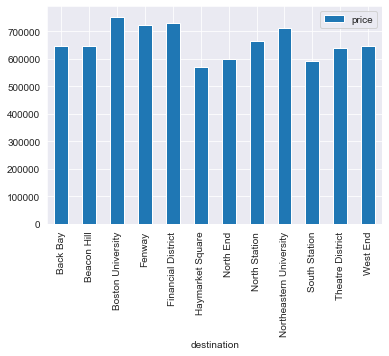

In [16]:
data[['destination','price']].groupby(by='destination').sum().plot(kind='bar')

<AxesSubplot:xlabel='source'>

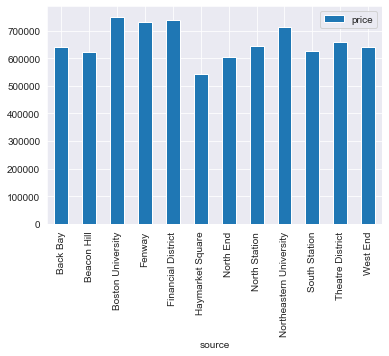

In [17]:
data[['source','price']].groupby(by='source').sum().plot(kind='bar')

In [18]:
data['long_summary'].value_counts()

 Mostly cloudy throughout the day.                      139450
 Partly cloudy throughout the day.                      100542
 Light rain in the morning.                              70829
 Rain throughout the day.                                37434
 Light rain in the morning and overnight.                34846
 Rain until morning, starting again in the evening.      33204
 Foggy in the morning.                                   30837
 Light rain until evening.                               24528
 Overcast throughout the day.                             5243
 Possible drizzle in the morning.                         1250
 Rain in the morning and afternoon.                        360
Name: long_summary, dtype: int64

In [19]:
data['short_summary'].value_counts()

 Overcast             151110
 Mostly Cloudy        101184
 Partly Cloudy         87760
 Clear                 60108
 Light Rain            37822
 Rain                  16415
 Possible Drizzle      12860
 Foggy                  6207
 Drizzle                5057
Name: short_summary, dtype: int64

In [20]:
data.icon.value_counts()

 cloudy                  151110
 partly-cloudy-night     109272
 partly-cloudy-day        79672
 rain                     72154
 clear-night              41664
 clear-day                18444
 fog                       6207
Name: icon, dtype: int64

In [21]:
#выбрасываем long summary и short_summary, оставляем icon
data.drop(['long_summary','short_summary'], axis=1, inplace=True)
data.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543564e+09,7,30,11,2018-11-30 07:47:56,North Station,South Station,Lyft,Lyft,9.0,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,1.544822e+09,21,14,12,2018-12-14 21:20:11,West End,South Station,Uber,Black SUV,27.0,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,1.543834e+09,10,3,12,2018-12-03 10:52:59,Theatre District,Boston University,Lyft,Shared,10.5,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,1.543759e+09,14,2,12,2018-12-02 14:03:04,Boston University,Back Bay,Uber,UberX,7.0,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,1.544973e+09,15,16,12,2018-12-16 15:05:17,Financial District,North End,Lyft,Lyft,7.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [22]:
data['surge_multiplier'].value_counts()

1.00    462777
1.25      8364
1.50      3779
1.75      1803
2.00      1665
2.50       123
3.00        12
Name: surge_multiplier, dtype: int64

In [23]:
#категориальные переменные
cat_cols=['cab_type','icon','name']

In [24]:
#сделаем порядковый encoding для категориальных переменных
import category_encoders as ce

ord_enc = ce.OrdinalEncoder(cols=cat_cols).fit(data)
data=ord_enc.transform(data)
data.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543564e+09,7,30,11,2018-11-30 07:47:56,North Station,South Station,1,1,9.0,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,1.544822e+09,21,14,12,2018-12-14 21:20:11,West End,South Station,2,2,27.0,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,1.543834e+09,10,3,12,2018-12-03 10:52:59,Theatre District,Boston University,1,3,10.5,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,1.543759e+09,14,2,12,2018-12-02 14:03:04,Boston University,Back Bay,2,4,7.0,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,1.544973e+09,15,16,12,2018-12-16 15:05:17,Financial District,North End,1,1,7.0,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [25]:
#закодируем source и destination так, чтобы одинаковым названиям соответствовали одинаковые числа
source_names=data['source'].value_counts().index

In [26]:
#создаем кодировщик для мест поездок
source_dict=dict()
for i, name in enumerate(source_names):
    source_dict[name]=i

source_dict

{'Financial District': 0,
 'South Station': 1,
 'Haymarket Square': 2,
 'North End': 3,
 'Back Bay': 4,
 'Boston University': 5,
 'Fenway': 6,
 'West End': 7,
 'Northeastern University': 8,
 'Beacon Hill': 9,
 'Theatre District': 10,
 'North Station': 11}

In [27]:
data['source']=data['source'].map(source_dict)
data.dropna(inplace=True)

In [28]:
data['source']

0         11
1          7
2         10
3          5
4          0
          ..
519798     3
519799     5
519800     2
519801     7
519802     6
Name: source, Length: 478523, dtype: int64

In [29]:
data['destination']=data['destination'].map(source_dict)
data.dropna(inplace=True)

In [30]:
data['destination']

0          1
1          1
2          5
3          4
4          3
          ..
519798     9
519799    10
519800     4
519801     6
519802     9
Name: destination, Length: 478523, dtype: int64

In [31]:
data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [32]:
#преобразуем тип даты в datetime и добавим новый признак - день недели
data['datetime']=pd.to_datetime(data['datetime'])
data['weekday']=data['datetime'].dt.weekday
data.head()

,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,weekday
0,1.543564e+09,7,30,11,2018-11-30 07:47:56,11,1,1,1,9.0,...,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600,4
1,1.544822e+09,21,14,12,2018-12-14 21:20:11,7,1,2,2,27.0,...,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600,4
2,1.543834e+09,10,3,12,2018-12-03 10:52:59,10,5,1,3,10.5,...,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800,0
3,1.543759e+09,14,2,12,2018-12-02 14:03:04,5,4,2,4,7.0,...,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000,6
4,1.544973e+09,15,16,12,2018-12-16 15:05:17,0,3,1,1,7.0,...,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,6


In [33]:
#выбрасываем столбец datetime и номер дня, так как скорее для прогноза будет важен час суток, месяц и день недели
data.drop(['datetime','day'],axis=1, inplace=True)

# Рассмотрим столбцы с apparent... с min/max и с low/high

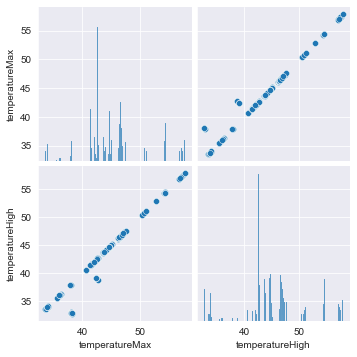

In [34]:
#некоторые признаки дублируют информацию, поэтому их можно удалить
sns.pairplot(data[['temperatureMax','temperatureHigh']])

In [35]:
data[['apparentTemperatureHigh','apparentTemperatureMax']].corr()

,apparentTemperatureHigh,apparentTemperatureMax
apparentTemperatureHigh,1.000000,0.974187
apparentTemperatureMax,0.974187,1.000000


In [36]:
#удаляем столбцы temperatureHigh и apparentTemperatureHigh так как они практически идентичны с temperatureMax и apparentTemperatureMax
data.drop(['temperatureHigh','apparentTemperatureHigh'],axis=1,inplace=True)

In [37]:
#аналогично со временем
data[['temperatureHighTime','temperatureMaxTime']].corr()

,temperatureHighTime,temperatureMaxTime
temperatureHighTime,1.000000,0.999884
temperatureMaxTime,0.999884,1.000000


In [38]:
data[['apparentTemperatureHighTime','apparentTemperatureMaxTime']].corr()

,apparentTemperatureHighTime,apparentTemperatureMaxTime
apparentTemperatureHighTime,1.0000,0.9999
apparentTemperatureMaxTime,0.9999,1.0000


In [39]:
data.drop(['temperatureHighTime','apparentTemperatureHighTime'],axis=1,inplace=True)

In [40]:
#про нижнюю температуру такого не скажешь, её оставляем
data[['temperatureMin','temperatureLow']].corr()

,temperatureMin,temperatureLow
temperatureMin,1.00000,0.47395
temperatureLow,0.47395,1.00000


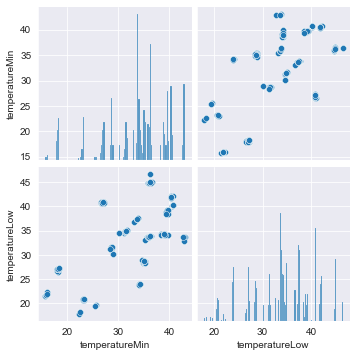

In [41]:
sns.pairplot(data[['temperatureMin','temperatureLow']])

In [42]:
data[['apparentTemperatureMin','apparentTemperatureLow']].corr()

,apparentTemperatureMin,apparentTemperatureLow
apparentTemperatureMin,1.00000,0.47984
apparentTemperatureLow,0.47984,1.00000


In [43]:
#время для нижней температуры хорошо коррелирует, удаляем temperatureLowTime
data[['temperatureLowTime','temperatureMinTime']].corr()

,temperatureLowTime,temperatureMinTime
temperatureLowTime,1.000000,0.999147
temperatureMinTime,0.999147,1.000000


In [44]:
data[['apparentTemperatureLowTime','apparentTemperatureMinTime']].corr()

,apparentTemperatureLowTime,apparentTemperatureMinTime
apparentTemperatureLowTime,1.000000,0.999083
apparentTemperatureMinTime,0.999083,1.000000


In [45]:
data.drop(['temperatureLowTime','apparentTemperatureLowTime'],axis=1,inplace=True)

In [46]:
# проверим корреляцию между temperatureMax и apparentTemperatureMax
data[['temperatureMax','apparentTemperatureMax']].corr()

,temperatureMax,apparentTemperatureMax
temperatureMax,1.000000,0.956221
apparentTemperatureMax,0.956221,1.000000


In [47]:
data[['temperatureMaxTime','apparentTemperatureMaxTime']].corr()

,temperatureMaxTime,apparentTemperatureMaxTime
temperatureMaxTime,1.000000,0.999959
apparentTemperatureMaxTime,0.999959,1.000000


In [48]:
data[['temperatureMin','apparentTemperatureMin']].corr()

,temperatureMin,apparentTemperatureMin
temperatureMin,1.000000,0.953896
apparentTemperatureMin,0.953896,1.000000


In [49]:
data[['temperatureMinTime','apparentTemperatureMinTime']].corr()

,temperatureMinTime,apparentTemperatureMinTime
temperatureMinTime,1.000000,0.999375
apparentTemperatureMinTime,0.999375,1.000000


In [50]:
data[['temperatureLow','apparentTemperatureLow']].corr()

,temperatureLow,apparentTemperatureLow
temperatureLow,1.000000,0.933907
apparentTemperatureLow,0.933907,1.000000


In [51]:
data[['temperature','apparentTemperature']].corr()

,temperature,apparentTemperature
temperature,1.000000,0.946171
apparentTemperature,0.946171,1.000000


In [52]:
#выбрасываем все apparent...
drop_cols=['apparentTemperatureLow', 'apparentTemperatureMax','apparentTemperatureMin','apparentTemperatureMaxTime',
           'apparentTemperatureMinTime','apparentTemperature']

data.drop(drop_cols, axis=1, inplace=True)
data.columns

Index(['timestamp', 'hour', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'weekday'],
      dtype='object')

In [53]:
#проверим visibility и visibility.1
data[['visibility','visibility.1']].corr()

,visibility,visibility.1
visibility,1.0,1.0
visibility.1,1.0,1.0


In [54]:
#выбрасываем visibility.1
data.drop(['visibility.1'],axis=1,inplace=True)

In [55]:
#проверим sunsetTime и sunriseTime
data[['sunsetTime','sunriseTime']].corr()

,sunsetTime,sunriseTime
sunsetTime,1.0,1.0
sunriseTime,1.0,1.0


In [56]:
data.drop(['sunsetTime'],axis=1,inplace=True)

In [57]:
#оставшиеся признаки
data.columns

Index(['timestamp', 'hour', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'weekday'],
      dtype='object')

In [58]:
data.head()

,timestamp,hour,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,ozone,sunriseTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,weekday
0,1.543564e+09,7,11,11,1,1,1,9.0,2.07,1.0,...,286.9,1543578866,0.79,0.0003,1543593600,28.78,1543579200,42.64,1543600800,4
1,1.544822e+09,21,12,7,1,2,2,27.0,2.14,1.0,...,290.2,1544789239,0.24,0.0000,1544806800,26.76,1544788800,46.90,1544814000,4
2,1.543834e+09,10,12,10,5,1,3,10.5,4.80,1.0,...,296.7,1543838223,0.89,0.0007,1543852800,42.96,1543896000,57.87,1543852800,0
3,1.543759e+09,14,12,5,4,2,4,7.0,0.03,1.0,...,276.0,1543751797,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,6
4,1.544973e+09,15,12,0,3,1,1,7.0,1.02,1.0,...,324.2,1544962119,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,6


<AxesSubplot:>

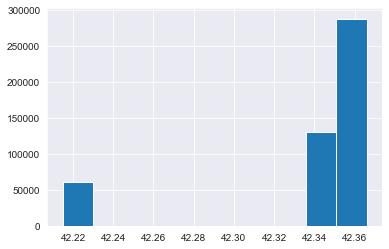

In [59]:
data['latitude'].hist()

<AxesSubplot:>

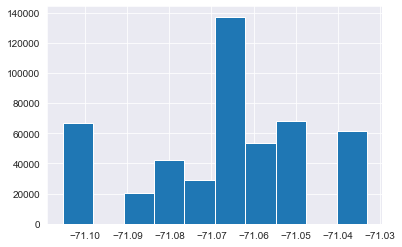

In [60]:
data['longitude'].hist()

<AxesSubplot:>

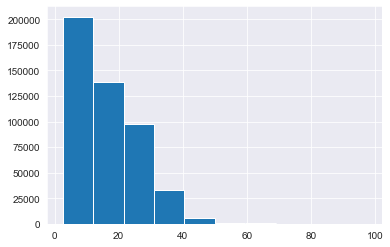

In [61]:
#посмотрим на распределение целевой переменной
data.price.hist()

<AxesSubplot:>

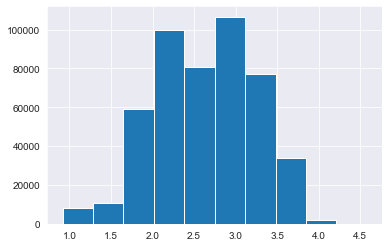

In [62]:
#оно сильно скошено влево, попробуем применить логарифм и будем предсказывать логарифм цены
data.price=np.log(data.price)
data.price.hist()

In [63]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size = 0.3)

In [64]:
data.columns

Index(['timestamp', 'hour', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'sunriseTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'weekday'],
      dtype='object')

In [65]:
#колонки для шкалирования (все, кроме price, cab_type, name, source и destination - которые мы закодировали сами)
scaler_cols=['timestamp','hour', 'month', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover',
       'uvIndex', 'ozone', 'sunriseTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime','weekday']


In [66]:
from sklearn.preprocessing import StandardScaler

# объявили объект стандартного шкалирования
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(df_train[scaler_cols])

StandardScaler()

In [67]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[scaler_cols])

# Применяем скалирвощик к тесту
df_test_scale = scaler.transform(df_test[scaler_cols])

In [68]:
# Заменяем значения на отскалированные
df_train[scaler_cols] = df_train_scale
df_test[scaler_cols] = df_test_scale

In [69]:
df_train.shape

(334966, 37)

In [70]:
df_test.shape

(143557, 37)

In [71]:
# Вытаскиваем цены и параметры поездок по разным переменным

y_train = df_train.price
y_test = df_test.price

X_train = df_train.drop('price', axis=1)
X_test = df_test.drop('price', axis=1)

# Линейная регрессия

In [72]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

In [73]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [74]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [75]:
print_metrics(np.exp(y_test),np.exp(y_pred_regr))

MAE: 6.355825090549135
RMSE: 8.652075130700482
R2: 0.14019197276569306
MAPE: 0.42931864816477083


# посмотрим на важность признаков

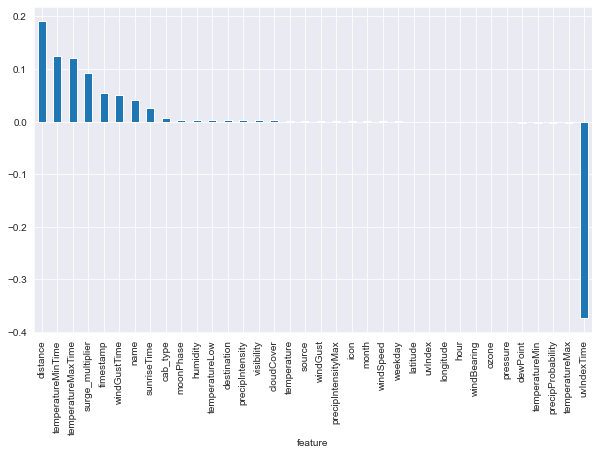

In [76]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns,
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

# применим Лассо регуляризацию

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Решётка для перебора параметра
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель
model_lasso = Lasso()

# Объявили перебор
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


In [78]:
print_metrics(np.exp(y_test),np.exp(y_pred_lasso))

MAE: 6.356759814090147
RMSE: 8.647933931136137
R2: 0.14101484691982968
MAPE: 0.42959651864732623


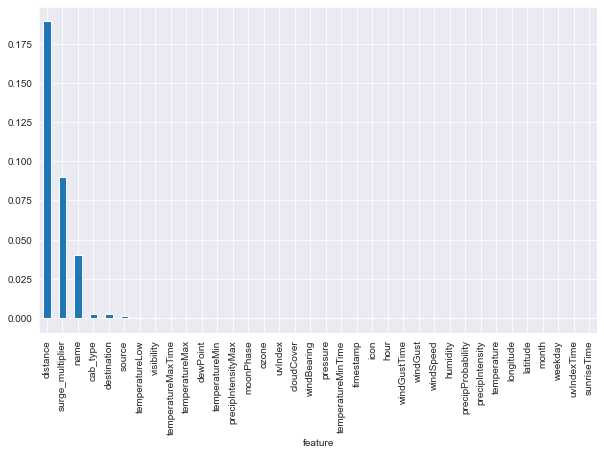

In [79]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns,
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

# Попробуем Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(random_state=42)

tree.fit(X_train, y_train)

y_tree_pred=tree.predict(X_test)

In [81]:
print_metrics(np.exp(y_test),np.exp(y_tree_pred))

MAE: 1.3380059927991366
RMSE: 2.3450061176700023
R2: 0.9368390153997057
MAPE: 0.09918414846817034


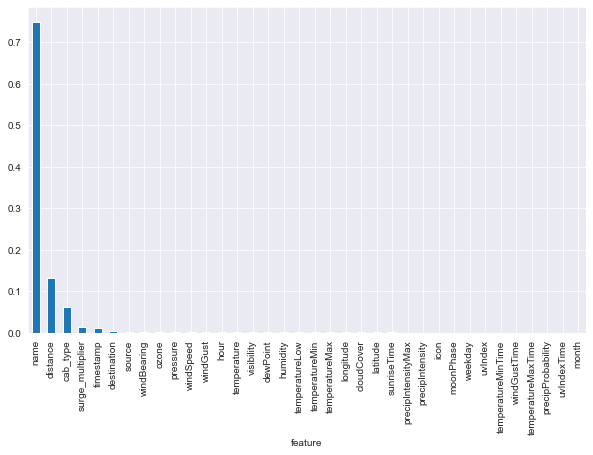

In [82]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns,
                                  "importance": tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

In [83]:
# Решётка для перебора параметра
param_grid = {'max_depth': [5, 10, 20, 30]}

# Объявили модель
tree = DecisionTreeRegressor(random_state=42)

# Объявили перебор
grid_tree = GridSearchCV(tree, param_grid, cv = 5)
grid_tree.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_tree.best_params_)

# Сделали прогнозы
y_tree_pred = grid_tree.predict(X_test)

Лучшее значение параметра: {'max_depth': 10}


In [84]:
print_metrics(np.exp(y_test),np.exp(y_tree_pred))

MAE: 1.1357009032231118
RMSE: 1.781217652562156
R2: 0.9635586118190831
MAPE: 0.0817593755947613


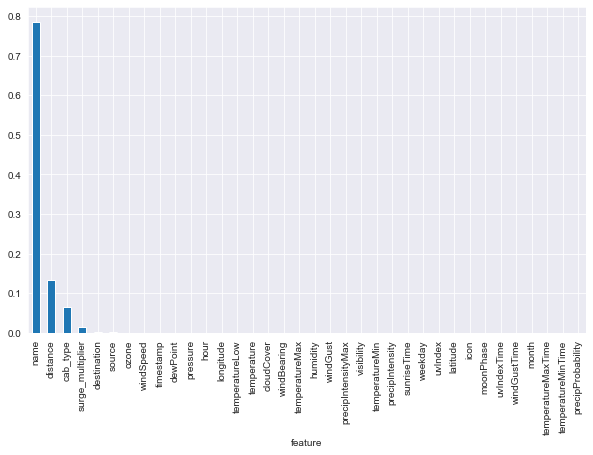

In [85]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns,
                                  "importance": grid_tree.best_estimator_.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

# Пробуем Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42, bootstrap=True)

rf.fit(X_train, y_train)

# Сделали прогнозы
y_rf_pred = rf.predict(X_test)

In [87]:
print_metrics(np.exp(y_test),np.exp(y_tree_pred))

MAE: 1.1357009032231118
RMSE: 1.781217652562156
R2: 0.9635586118190831
MAPE: 0.0817593755947613


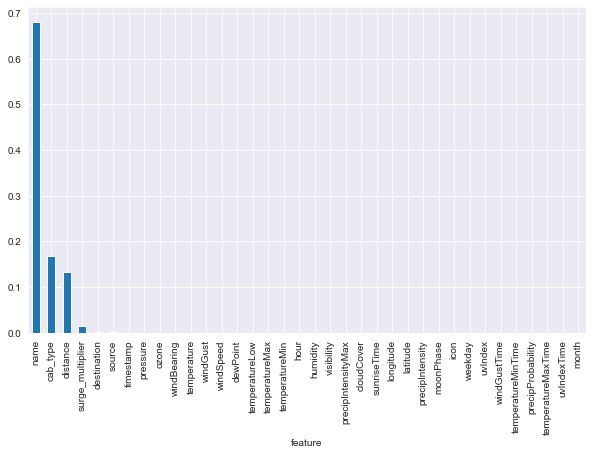

In [89]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns,
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

примерно то же качество модели, что и на Decision Tree